In [1]:
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
np.random.seed(2020)

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [4]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum(lr=0.01)
optimizers['Nesterov'] = Nesterov(lr=0.01)
optimizers['AdaGrad'] = AdaGrad(lr=0.01)
optimizers['RMSProp'] = RMSprop(lr=0.01)
optimizers['Adam'] = Adam(lr=0.01)

networks = {}
train_loss = {}
learning_rate = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
    train_loss[key] = []
    learning_rate[key] = []

In [5]:
def train():
    for i in range(max_iterations):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for key in optimizers.keys():
            grads = networks[key].gradient(x_batch, t_batch)
            optimizers[key].update(networks[key].params, grads)

            loss = networks[key].loss(x_batch, t_batch)
            train_loss[key].append(loss)
            learning_rate[key].append(optimizers[key].lr)

        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")
            for key in optimizers.keys():
                loss = networks[key].loss(x_batch, t_batch)
                print(key + ": " + str(loss))

In [6]:
train()

===========iteration:0===========
SGD: 2.4426208084675496
Momentum: 2.4596468664040714
Nesterov: 2.4022083884411973
AdaGrad: 2.2912315586960075
RMSProp: 14.118955890136924
Adam: 2.197147747365482
===========iteration:100===========
SGD: 1.4577955729561127
Momentum: 0.42839121832593463
Nesterov: 0.36416477641024236
AdaGrad: 0.16971762537522406
RMSProp: 0.3665471826762823
Adam: 0.28977159391357243
===========iteration:200===========
SGD: 0.704254013044961
Momentum: 0.23026462031358194
Nesterov: 0.2368106945881458
AdaGrad: 0.09405047354344175
RMSProp: 0.27280271277605417
Adam: 0.21373800329241494
===========iteration:300===========
SGD: 0.45819540695532573
Momentum: 0.1713077816871061
Nesterov: 0.11037172003705792
AdaGrad: 0.04826734129402553
RMSProp: 0.15883602522488982
Adam: 0.07423511723233224
===========iteration:400===========
SGD: 0.4373337046449569
Momentum: 0.17024083528761633
Nesterov: 0.1589091356559632
AdaGrad: 0.06205548180099468
RMSProp: 0.10846359076876294
Adam: 0.0638627537

In [13]:
def plot_gragh():
    markers = {"SGD": "o", "Momentum": "x", "Nesterov": "^", "AdaGrad": "s", "RMSProp": "*", "Adam": "D"}
    x = np.arange(max_iterations)
    plt.figure(figsize=(15, 10))
    for key in optimizers.keys():
        plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.ylim(0, 1)
    plt.legend()
    plt.savefig("optimizer_compare.png")

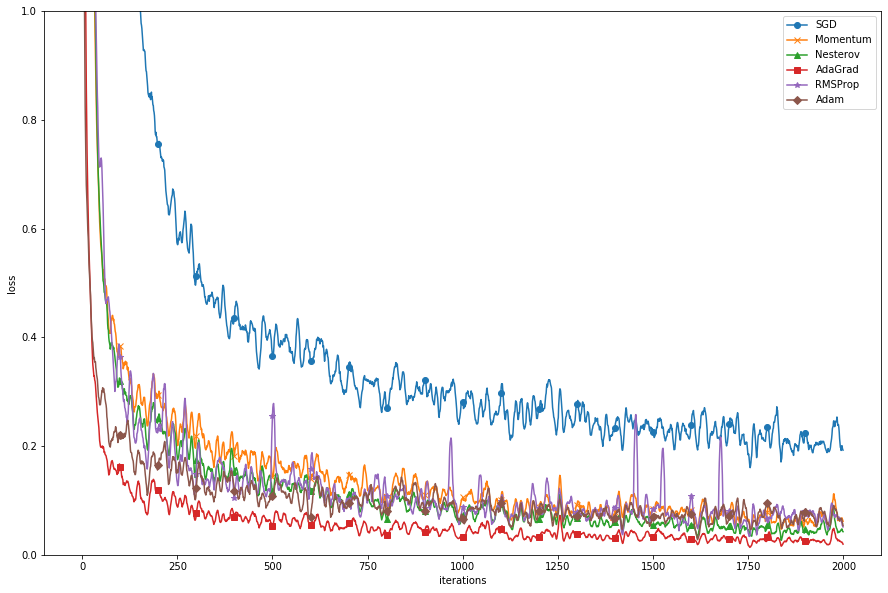

In [14]:
plot_gragh()